In [1]:
# 데이터 파일 불러오기
import pandas as pd
import numpy as np

fileName = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
dataframe = pd.read_csv(fileName)

In [2]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("the features of DataSet:")
print(dataframe.columns)

the features of DataSet:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
print("first 5 rows of DataSet:")
print(dataframe.head())

first 5 rows of DataSet:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo

In [5]:
print("DataTypes of DataSet:")
print(dataframe.dtypes)

DataTypes of DataSet:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
print("NaN counts of DataSet:")
print(dataframe.isna().sum())

NaN counts of DataSet:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


`TotalCharges`의 데이터타입이 `Object`로 설정되어 있는 것을 확인할 수 있음. -> `Numeric`으로 변환

# Decision Tree Classifier
먼저 전처리 -> 모델 -> 평가 흐름을 확인하고, 그 후 각 파라미터의 조합 중, 최적의 BaseLine 모델 찾기


## Data Preprocessing

In [7]:
df = dataframe.copy()

In [8]:
# Object -> numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df['TotalCharges'].dtype

dtype('float64')

In [10]:
print(f"num of NaN in TotalCharges : {df['TotalCharges'].isna().sum()}")

num of NaN in TotalCharges : 11


In [11]:
# 숫자형 데이터 NaN 처리
numericFeatures = df.select_dtypes(include=np.number).columns
df[numericFeatures] = df[numericFeatures].fillna(value=df[numericFeatures].median())

In [12]:
print(f"num of NaN in TotalCharges : {df['TotalCharges'].isna().sum()}")

num of NaN in TotalCharges : 0


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# 필요없는 feature 삭제
df.drop(columns=['customerID'], inplace=True)

In [15]:
# 평균 달 지출 feature 추가
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure'].replace(0, 1)
df['AvgMonthlySpend']

0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: AvgMonthlySpend, Length: 7043, dtype: float64

In [16]:
# Categoric -> numeric 수행
# 1. one hot encoding
# 2. label encoding
# 일단 여기선 one hot encoding을 통해 변환 
target='Churn'
df[target] = df[target].map({'Yes':1, 'No':0})

categoricFeatures = df.select_dtypes(include='object').columns
categoricFeatures = categoricFeatures.to_list()
categoricFeatures

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [17]:
# one hot encoding
# drop_first=True의 경우:
#Service:[YES, NO] -> SERVICE_YES = [TRUE,NO]
# drop_first=False의 경우:
#Service:[YES, NO] -> SERVICE_YES = [TRUE,NO], SERVICE_NO = [TRUE, NO] 
df = pd.get_dummies(df, columns=categoricFeatures, drop_first=True)

In [18]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,29.850000,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,55.573529,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,54.075000,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,40.905556,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,75.825000,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


## Train model

In [19]:
# 필요한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [20]:
# feature, target 분리
target='Churn'
X = df.drop(target, axis=1)
y = df[target]

In [21]:
# train : test = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=1
    )

In [22]:
# DecisionTreeClassifier에 들어갈 파라미터 값 선정.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 3, 5, 7, 10]
    }

In [23]:
# 앞선 각 파라미터 조합을 갖는 모델 생성
# scoring = 'f1': 
# 각 파라미터 조합 중에서 f1 score을 기준으로 모델 선정.
# n_jobs = -1: 
# 사용하는 프로세서의 수, -1 : 모든 프로세서 사용
grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=1),
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10]},
             scoring='f1')

In [25]:
#그 중 최적의 모델 
bestModel = grid_search.best_estimator_

## Evaluate

In [26]:
# 모델이 예측한 Churn: 1 or 0
y_pred = bestModel.predict(X_test)

# 모델이 예측한 Churn = 1일 확률.
# y_pred == (y_proba >= .5).astype(int)
y_proba = bestModel.predict_proba(X_test)[:, 1]

In [27]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1035
           1       0.53      0.62      0.57       374

    accuracy                           0.75      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.75      0.76      1409



In [29]:
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.7845


In [30]:
print(f"Precision: {precision:.4f}")

Precision: 0.5298


In [31]:
print(f"Recall: {recall:.4f}")

Recall: 0.6176


In [32]:
print(f"F1 Score: {f1:.4f}", )

F1 Score: 0.5704


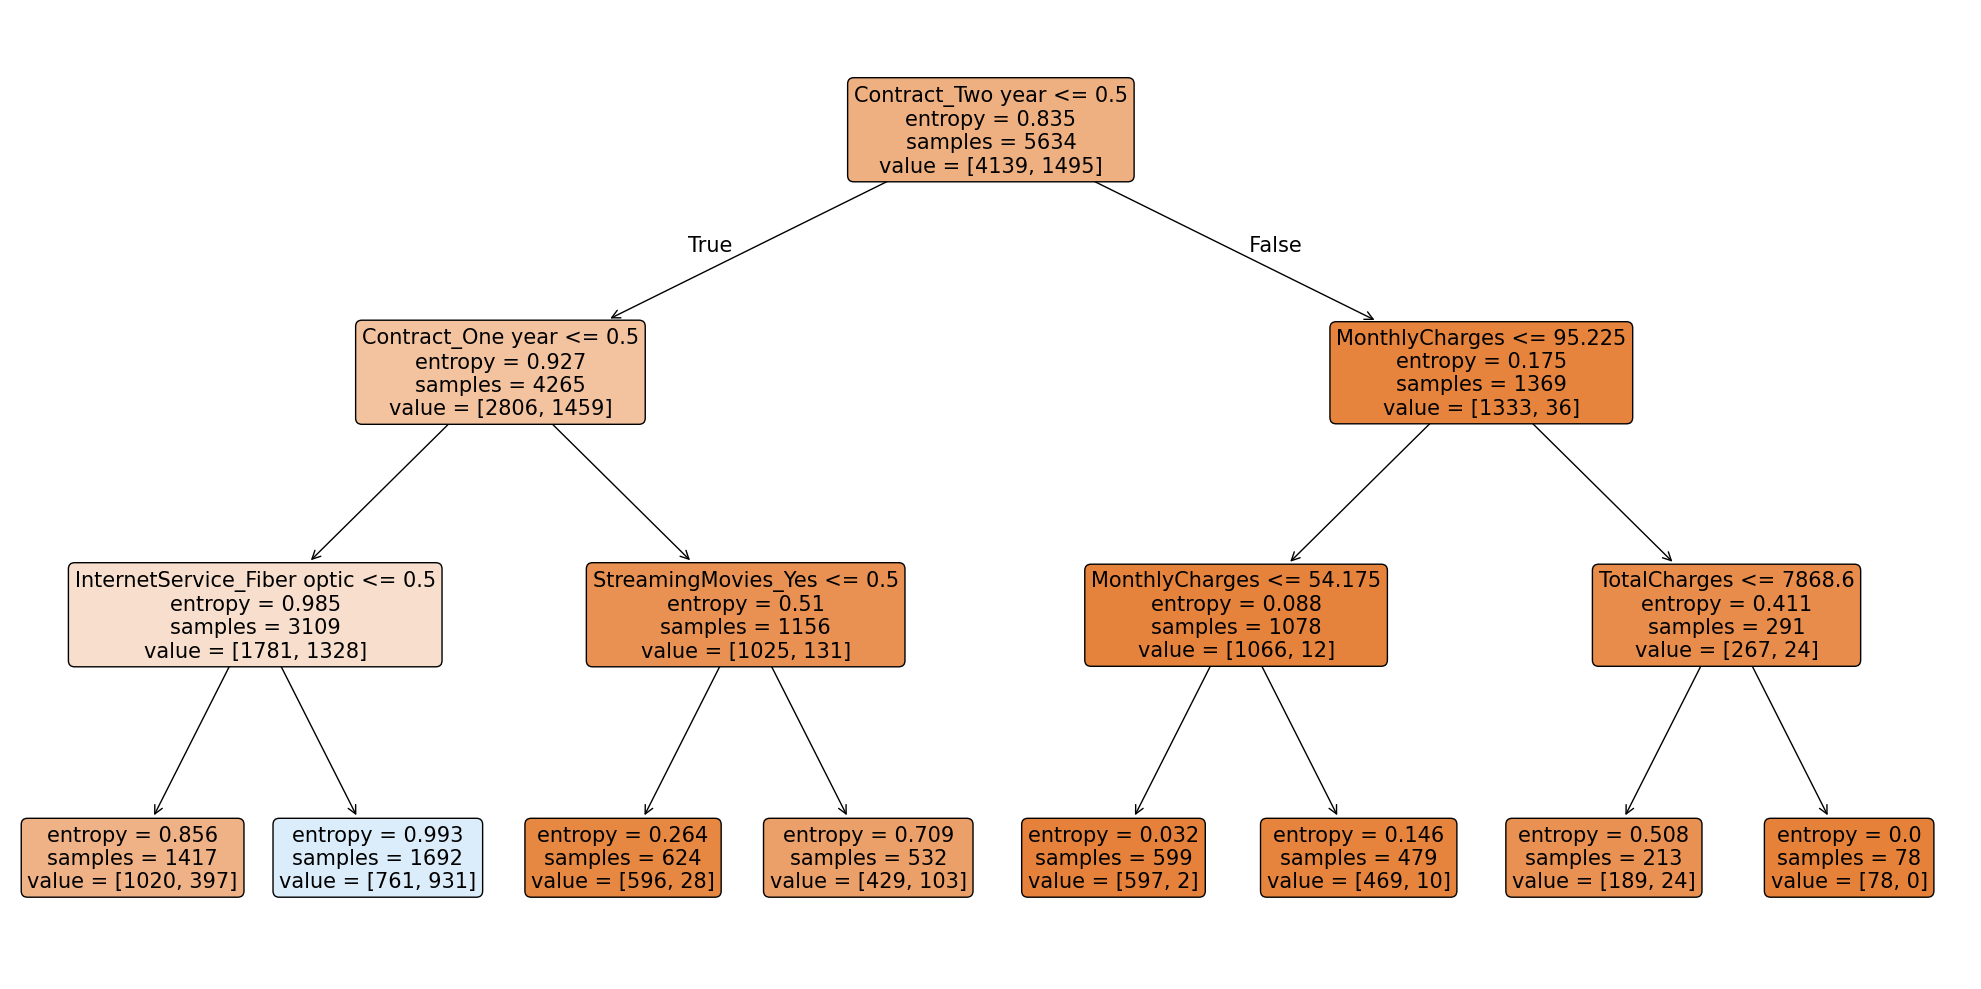

In [33]:
# decision tree 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(bestModel,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=5,
          fontsize=15)

plt.tight_layout()
plt.show()

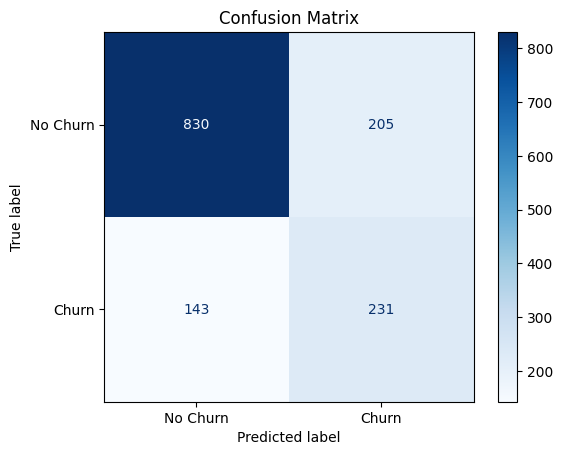

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix,
    display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

### Adavanced 

#### RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=1
    )

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 3, 5, 7, 10]
    }

grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=1),
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = bestModel.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

"""
Classification Report ( Decision Tree Classifier ):
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1035
           1       0.53      0.62      0.57       374

    accuracy                           0.75      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.75      0.76      1409
"""

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



'\nClassification Report ( Decision Tree Classifier ):\n              precision    recall  f1-score   support\n\n           0       0.85      0.80      0.83      1035\n           1       0.53      0.62      0.57       374\n\n    accuracy                           0.75      1409\n   macro avg       0.69      0.71      0.70      1409\nweighted avg       0.77      0.75      0.76      1409\n'

In [37]:
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
print(f"ROC-AUC: {roc_auc:.4f}")
#ROC-AUC: 0.7845

ROC-AUC: 0.7845


In [39]:
print(f"Precision: {precision:.4f}")
#Precision: 0.5298

Precision: 0.6567


In [40]:
print(f"Recall: {recall:.4f}")
#Recall: 0.6176

Recall: 0.4706


In [41]:
print(f"F1 Score: {f1:.4f}", )
#F1 Score: 0.5704

F1 Score: 0.5483


#### Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=1
    )

param_grid = {
    'n_estimators': [100, 200],        
    'learning_rate': [0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7],            
    'min_samples_split': [2, 5],       
    'min_samples_leaf': [1, 3, 5, 7, 10]        
}
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid,
    scoring='f1',         
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [43]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [45]:
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}", )

ROC-AUC: 0.8362
Precision: 0.6782
Recall: 0.5241
F1 Score: 0.5913


## Function

In [46]:
# 데이터 전처리 함수
from typing import Literal

def preprocessing(
    df,
    convert_No_Service_to_No = False,
    method: Literal['one_hot','label','NONE'] = 'one_hot',
):
    """_summary_
        data processing function
    Args:
        df (pd.DataFrame): data
        convert_No_Service_to_No (bool, optional):whether to change No (phone, internet) service -> No. Defaults to False.
        method (Literal[one_hot,label,NONE], optional): method to change categoric to numeric. Defaults to 'one_hot'. 'NONE' mean nothing do.

    Returns:
        pd.DataFrame: preprocessed dataFrame
    """
    df.drop(columns=['customerID'], inplace=True)
    # drop meaningless features.
    
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # change datatype of 'TotalCharges' into nemeric from Object.
    # param, errors, coerce mean:
    # invalid parsing will be set as NaN.
    # ref: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
    
    numericFeatures = df.select_dtypes(include=np.number).columns
    df[numericFeatures] = df[numericFeatures].fillna(value=df[numericFeatures].median())
    
    df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
    # change the datatype of 'SeniorCitizen, int64, to boolean
    
    if convert_No_Service_to_No:
        feature_with_phoneService = [
            'MultipleLines'
        ]
        features_with_internetService = [
            "OnlineSecurity",
            "OnlineBackup",
            "DeviceProtection",
            "TechSupport",
            "StreamingTV",
            "StreamingMovies"
        ]
        for column in feature_with_phoneService:
            df[column] = df[column].replace("No phone service","No")
        
        for column in features_with_internetService:
            df[column] = df[column].replace("No internet service","No")
    
    if method != 'NONE':
        df = categoricEncoding(df=df, method=method)
    
    return df

from sklearn.preprocessing import LabelEncoder
def categoricEncoding(df, method: Literal['one_hot','label'] = 'one_hot'):
    """_summary_
        change categoric to numeric with one hot encoding or label encoding
    Args:
        df (pd.DataFrame): data
        method (Literal[one_hot,label], optional): method. Defaults to 'one_hot'.

    Returns:
        pd.DataFrame: encoded DataFrame
    """
    copiedDf = df.copy()
    if method == 'one_hot':
        copiedDf['Churn'] = copiedDf['Churn'].map({'Yes':1, 'No':0})
        categoricFeatures = copiedDf.select_dtypes(include='object').columns
        categoricFeatures = categoricFeatures.to_list()
        copiedDf = pd.get_dummies(copiedDf, columns=categoricFeatures, drop_first=True)
        
    elif method == 'label':
        for col in copiedDf.select_dtypes(include='object').columns:
            copiedDf[col] = LabelEncoder().fit_transform(copiedDf[col])
            
    return copiedDf

In [47]:
# 모델 학습 함수
def train_decisionTree(df, 
                        param_grid = {
                            'criterion': ['gini', 'entropy'],
                            'max_depth': [3, 5, 7, 10, None],
                            'min_samples_leaf': [1, 3, 5, 7, 10]
                            },
                        target='Churn'
                        ):
    """_summary_
        Given some parameters for training decision tree model, 
        train decision tree models with optional parameters and return the best model.
        
    Args:
        df (pd.DataFrame): 
            dataSet for training decision tree model.
        param_grid (dict, optional): 
            parameters for training decision tree model. among these decision model, the best performance model is selected. 
                Defaults to { 'criterion': ['gini', 'entropy'],
                'max_depth': [3, 5, 7, 10, None],
                'min_samples_leaf': [1, 3, 5, 7, 10] }.
    Returns:
        best performance model, test data set used to train model.   
    """
    X = df.drop(target, axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=1
    )
    
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=1),
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    bestModel = grid_search.best_estimator_
    
    return bestModel, X_test, y_test

In [48]:
# 모델 평가 함수
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

def returnThePerformance_decisionTree(bestModel, X_test, y_test, printResult = False):
    """_summary_
        evaluate model.
    Args:
        bestModel (DecisionTreeClassifier): model
        X_test (arraylike): features for prediction
        y_test (arraylike): target for prediction
        printResult (bool, optional): whether print the result. Defaults to False.

    Returns:
        each scores from model.
    """
    y_pred = bestModel.predict(X_test)
    y_proba = bestModel.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if printResult:
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        # -----------------------------
        # ROC AAUC:
        # how well the model predict churn or not
        # -----------------------------
        print(f"ROC-AUC: {roc_auc:.4f}")

        # -----------------------------
        # precision:
        # TP / (TP + FP), 
        # how many practically really truly churn from predicted churn with model.
        # -----------------------------
        print(f"Precision: {precision:.4f}")

        # -----------------------------
        # recall:
        # TP / (TP + FN), 
        # how many correctly prediction with model from practivally churn.
        # -----------------------------
        print(f"Recall: {recall:.4f}")

        # -----------------------------
        # F1 Score:
        # 2 * precision * Recall / (Precision + Recall), 
        # how many correctly prediction with model from practivally churn.
        # -----------------------------
        print(f"F1 Score: {f1:.4f}", )
    return roc_auc, precision, recall, f1

In [49]:
# 각 파라미터 조합에 따른 모델 학습
df = dataframe.copy()

# 데이터 전처리 각 파라미터. -> 각 파라미터의 조합 2 x 2 = 4의 모델 성능 평가
param_grid={
        'convert_No_service_to_No': [True,False],
        'encoding_method': ['one_hot','label']
        }

In [50]:
# 각 모델의 성능 정보를 넣을 리스트
results = []

from sklearn.model_selection import ParameterGrid
param_combination = ParameterGrid(param_grid)

In [51]:
for param in param_combination:
    df_param = preprocessing(
        df = df.copy(),
        convert_No_Service_to_No = param['convert_No_service_to_No'],
        method = param['encoding_method']
    )
    
    best_model_param, X_test, y_test = train_decisionTree(df=df_param)
    
    roc_auc, precision, recall, f1 = returnThePerformance_decisionTree(
        bestModel = best_model_param,
        X_test = X_test,
        y_test = y_test
        )
    results.append({
        **param,  
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    })
results =  pd.DataFrame(results)

In [52]:
results

,convert_No_service_to_No,encoding_method,precision,recall,f1,roc_auc
0,True,one_hot,0.529817,0.617647,0.570370,0.784537
1,True,label,0.600000,0.457219,0.518968,0.788054
2,False,one_hot,0.529817,0.617647,0.570370,0.784537
3,False,label,0.570000,0.457219,0.507418,0.783204


In [53]:
results['Setting'] = results.apply(
    lambda row: f"{row['encoding_method']}, convert={row['convert_No_service_to_No']}",
    axis=1
)

metrics = ['precision', 'recall', 'f1', 'roc_auc']
titles = ['Precision', 'Recall', 'F1 Score', 'ROC-AUC']

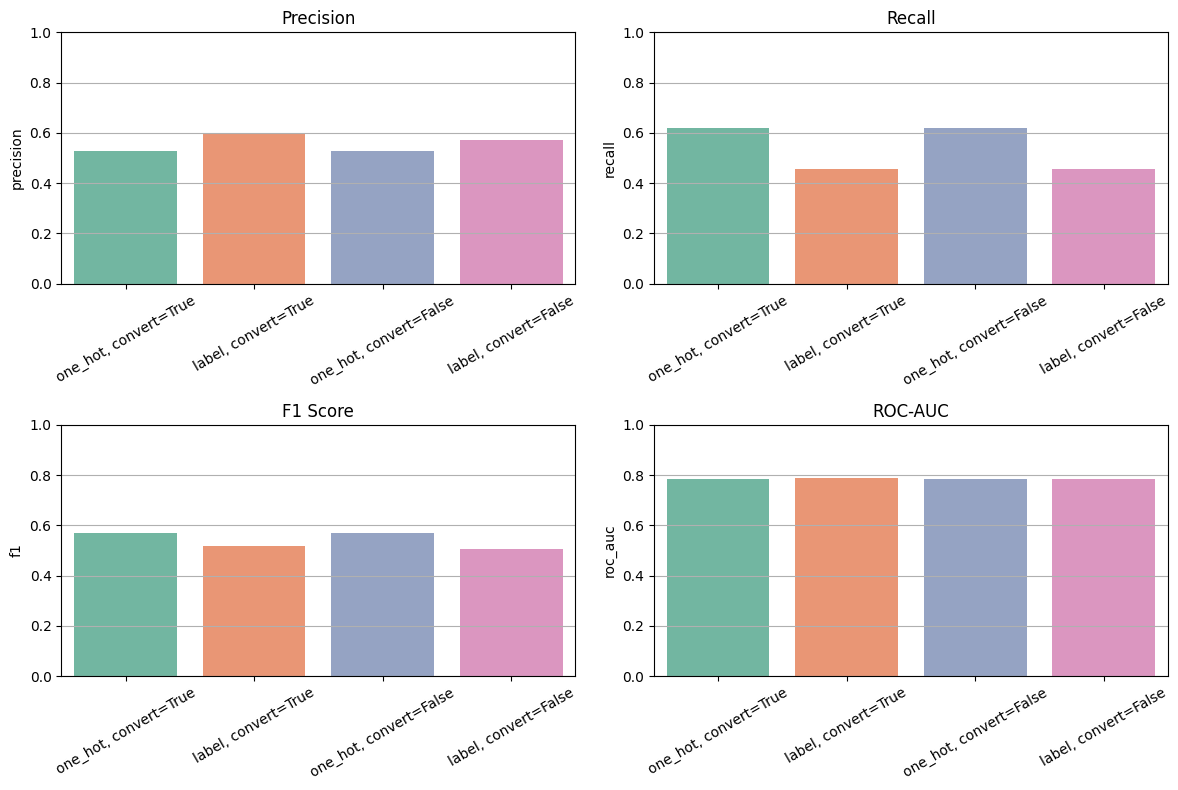

In [54]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(
        x='Setting',
        y=metric,
        data=results,
        ax=axes[i],
        palette='Set2',
        hue='Setting'
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(True, axis='y')

plt.tight_layout()
plt.show()

# K mean clustering

## Data Preprocessing
전처리 과정에서 정규화와 outlier 처리를 추가한다.

In [55]:
# 이전의 preprocessing 함수를 수정하기 전, 각 전처리 함수를 추가한다.
def dealingOutlier(df):  
    # list for feature names in which data is numeric
    numericFeatures = df.select_dtypes(include=np.number).columns.to_list()
    
    # change outlier data to median
    # outlier is not in between 
    for col in numericFeatures:
        Q1 = df[col].quantile(1/4)
        Q3 = df[col].quantile(3/4)
        IQR = Q3 - Q1
        lowerBound = Q1 - 1.5 * IQR
        upperBound = Q3 + 1.5 * IQR

        median = df[col].median()
        df.loc[df[col] < lowerBound, col] = median
        df.loc[df[col] > upperBound, col] = median

In [56]:
from sklearn.preprocessing import StandardScaler

def normalizeData(df):
    numericFeatures = df.select_dtypes(include=np.number).columns.to_list()
    df[numericFeatures] = StandardScaler().fit_transform(df[numericFeatures])

In [57]:
def preprocessing(
    df,
    dealing_outlier = False,
    convert_No_Service_to_No = False,
    run_normalize = False,
    method: Literal['one_hot','label','NONE'] = 'one_hot',
    ):
    """_summary_
        data processing function
    Args:
        df (pd.DataFrame): data
        dealing_outlier (bool, optional): whether to manage outlier. Defaults to False.
        convert_No_Service_to_No (bool, optional):whether to change No (phone, internet) service -> No. Defaults to False.
        run_normalize (bool, optional): whether to nomalize numeric data. Defaults to False.
        method (Literal[one_hot,label,NONE], optional): method to change categoric to numeric. Defaults to 'one_hot'. 'NONE' mean nothing do.

    Returns:
        pd.DataFrame: preprocessed dataFrame
    """
    
    df.drop(columns=['customerID'], inplace=True)
    # drop meaningless features.
    
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # change datatype of 'TotalCharges' into nemeric from Object.
    # param, errors, coerce mean:
    # invalid parsing will be set as NaN.
    # ref: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
    
    numericFeatures = df.select_dtypes(include=np.number).columns
    df[numericFeatures] = df[numericFeatures].fillna(value=df[numericFeatures].median())
    
    df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
    # change the datatype of 'SeniorCitizen, int64, to boolean
    
    
    
    if dealing_outlier:
        # -------------------------------------
        # Manage outlier data
        # -------------------------------------
        dealingOutlier(df)
    
    if convert_No_Service_to_No:
        feature_with_phoneService = [
            'MultipleLines'
        ]
        
        features_with_internetService = [
            "OnlineSecurity",
            "OnlineBackup",
            "DeviceProtection",
            "TechSupport",
            "StreamingTV",
            "StreamingMovies"
        ]
        for column in feature_with_phoneService:
            df[column] = df[column].replace("No phone service","No")
        
        for column in features_with_internetService:
            df[column] = df[column].replace("No internet service","No")
    
    if run_normalize:
        # -------------------------------------
        # normalize data
        # -------------------------------------
        normalizeData(df=df)
    
    if method != 'NONE':
        df = categoricEncoding(df=df, method=method)
    
    return df

In [58]:
df = dataframe.copy()
df = preprocessing(
    df=df,
    dealing_outlier=True,
    convert_No_Service_to_No=True,
    run_normalize=True,
    method='one_hot'
)

In [59]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,-1.277445,-1.160323,-0.994242,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,False,0.066327,-0.259629,-0.173244,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,False,-1.236724,-0.362660,-0.959674,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,False,0.514251,-0.746535,-0.194766,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,False,-1.236724,0.197365,-0.940470,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


`elbow method`를 통해 최적의 클러스터 수를 찾는다.

In [60]:
## Train Model

In [61]:
# elbow method 함수 선언
from sklearn.cluster import KMeans

def elbow_method(
    df,
    KRange=range(2,7)
    ):
    X = df.copy()
    scores = []
    
    for k in KRange:
        model = KMeans(
            n_clusters=k,
            n_init=10,
            random_state=1
        ).fit(X)
        scores.append(model.inertia_)
        
    plt.figure(figsize=(12, 8))
    plt.plot(KRange, scores, marker='o')
    plt.xlabel("n_cluster")
    plt.ylabel("inertia")
    plt.title("Elbow method")
    plt.grid(True)
    plt.show()

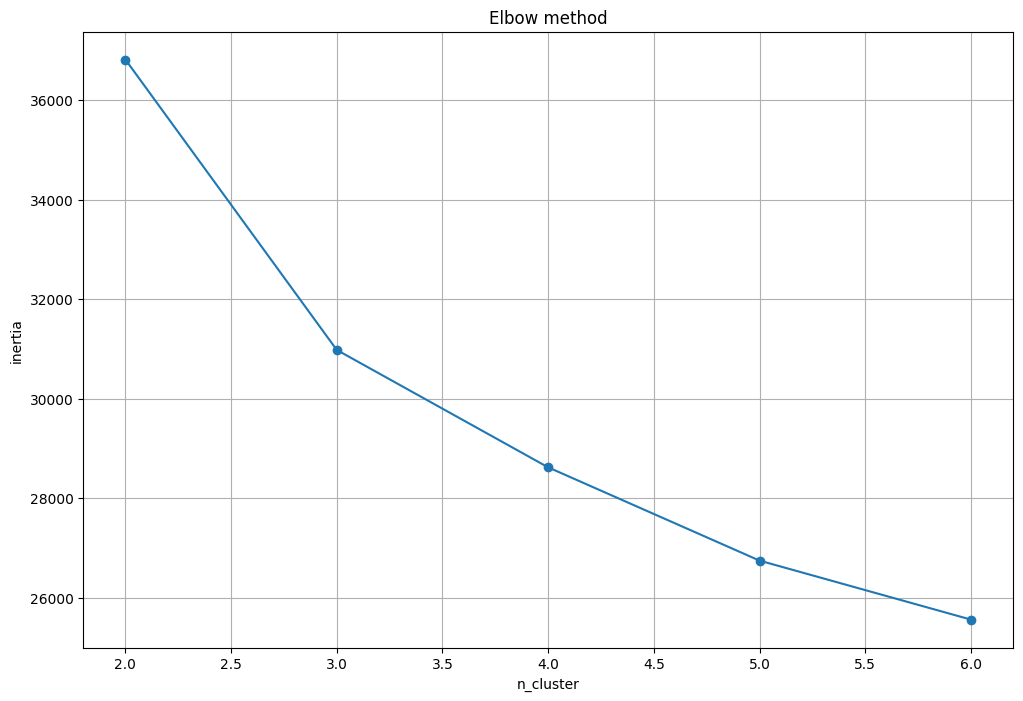

In [62]:
elbow_method(df)

클러스터 수 = 3

In [63]:
def profileCluster(df, 
                   n_cluster=3):
    X = df.copy()
    
    model = KMeans(
        n_clusters=n_cluster,
        random_state=1,
        n_init=10
    )
    X['Cluster'] = model.fit_predict(X)

    # 각 cluster의 평균값
    profile = X.groupby('Cluster').mean(numeric_only=True)
    
    return X, profile

In [64]:
best_cluster_num = 3
clustered_df, cluster_profile = profileCluster(df, n_cluster=best_cluster_num)

In [65]:
cluster_profile

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.197362,1.064671,0.816412,1.299017,0.136880,0.498863,0.695316,0.350159,0.929059,0.692588,...,0.693952,0.575716,0.713051,0.719873,0.326967,0.432469,0.686221,0.318781,0.280582,0.077763
1,0.053533,-0.210118,-1.200884,-0.672820,0.113919,0.523769,0.454390,0.391006,0.828266,0.167880,...,0.071949,0.107495,0.032976,0.032120,0.230407,0.303640,0.346039,0.209422,0.115632,0.469807
2,0.232363,-0.737579,0.402062,-0.512358,0.518932,0.492228,0.323635,0.170187,0.950179,0.420885,...,0.290155,0.210044,0.423276,0.428059,0.086090,0.013950,0.738940,0.132324,0.589079,0.137106


In [66]:
def plot_clusterBoxplots(df, clusterFeature='Cluster', features=None):
    """_summary_
        print data statistic info in each feature
    Args:
        df (pd.DataFrame): data
        clusterFeature (str, optional): Cluster columns. Defaults to 'Cluster'.
        features (list, optional): feature list to check data info. Defaults to None.
    """
    if features is None:
        features = df.select_dtypes(include='number').drop(columns=[clusterFeature]).columns
    rows ,cols = 1, len(features)
    
    fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(4*cols, 4*rows))
    axes = axes.flatten()
    
    for idx, feature in enumerate(features):
        sns.boxplot(x=clusterFeature, y=feature, data=df, ax=axes[idx])
        axes[idx].set_title(f"{feature}")
    
    plt.tight_layout()
    plt.show()

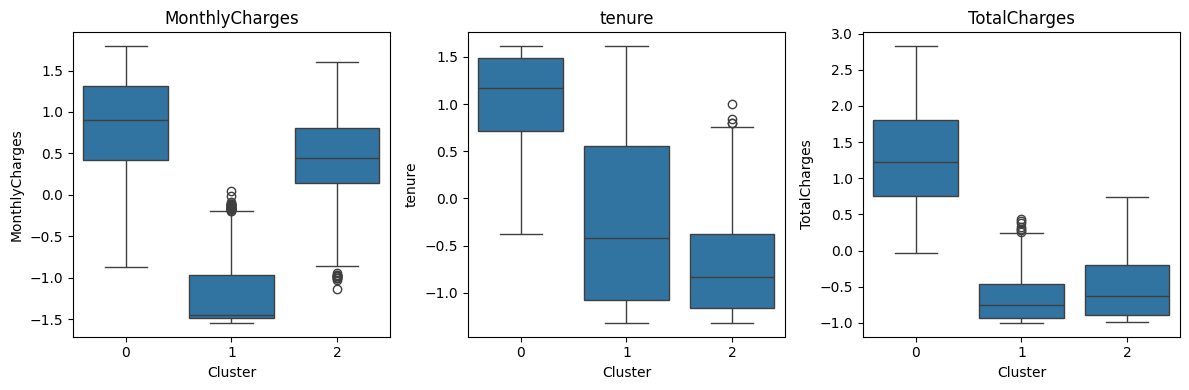

In [67]:
plot_clusterBoxplots(clustered_df, features=['MonthlyCharges', 'tenure', 'TotalCharges'])

In [68]:
# 각 cluster 별 고객 수
def numOfClient_clusters(df, clusterFeature='Cluster'):
    sns.countplot(x=clusterFeature, data=df)
    plt.title("num of clients in each cluster")
    plt.tight_layout()
    plt.show()

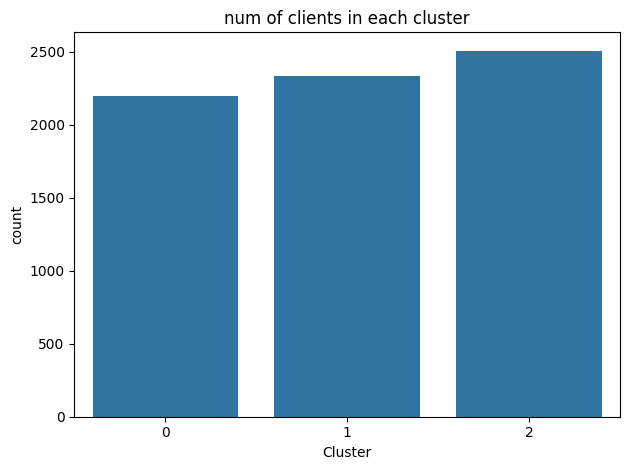

In [69]:
numOfClient_clusters(df=clustered_df)

In [70]:
# 각 cluster 그래프 시각화
from sklearn.decomposition import PCA

def show_cluster_with_pca(df, clusterFeature='Cluster'):
    X = df.copy().drop(columns=[clusterFeature])
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    components_df = pd.DataFrame(
        pca.components_,
        columns=X.columns,
        index=["PCA1", "PCA2"]
    )

    explained_var = pca.explained_variance_ratio_

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1],
        hue=df[clusterFeature], palette='Set2', s=50
    )
    plt.title("Customer Clusters (PCA Projection)")
    plt.xlabel(f"PCA 1 ({explained_var[0]*100:.1f}%)")
    plt.ylabel(f"PCA 2 ({explained_var[1]*100:.1f}%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nPCA explained variance ratio:")
    for i, var in enumerate(explained_var, 1):
        print(f" - PCA {i}: {var:.4f} ({var*100:.2f}%)")

    print("\nPCA 구성 성분:")
    #print(components_df)
    display(components_df)
    

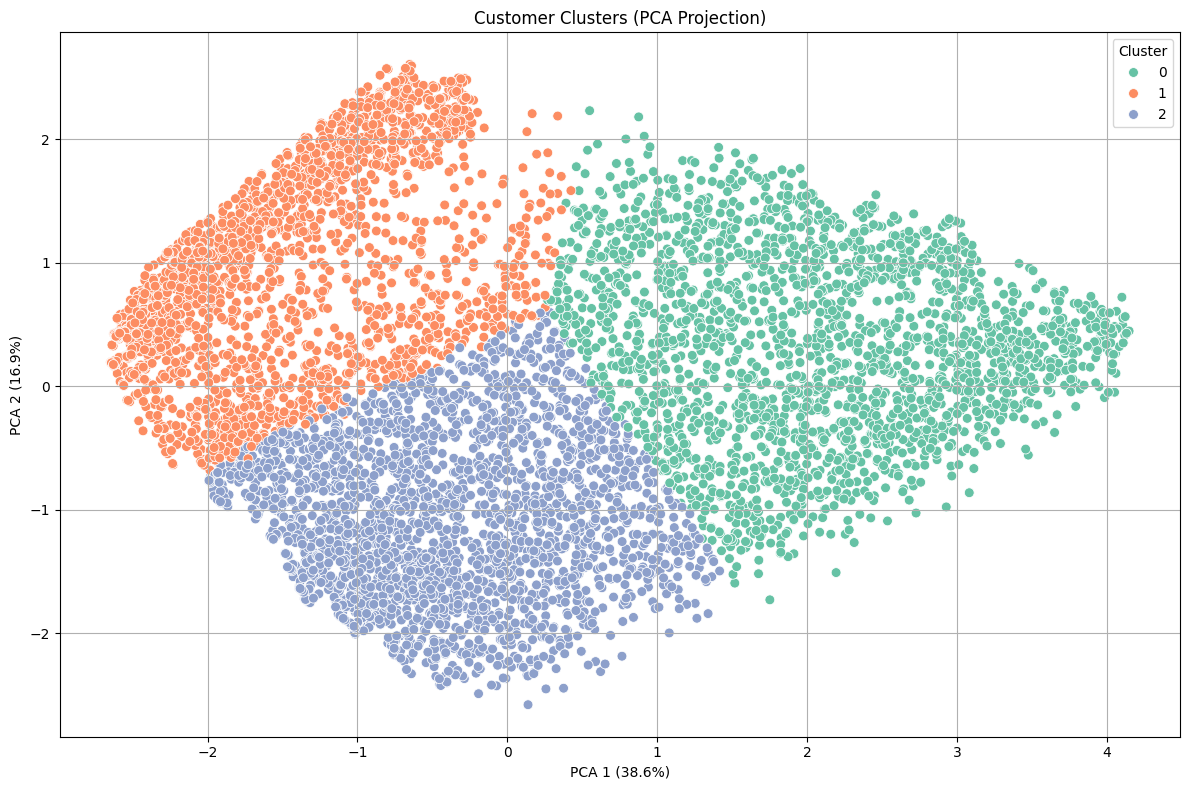


PCA explained variance ratio:
 - PCA 1: 0.3857 (38.57%)
 - PCA 2: 0.1685 (16.85%)

PCA 구성 성분:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
PCA1,0.033075,0.451334,0.478695,0.571906,-0.028779,-0.002271,0.094994,0.010762,0.021379,0.155156,...,0.164377,0.124953,0.177640,0.178845,0.033051,0.076015,0.071587,0.044058,0.010687,-0.097445
PCA2,-0.079839,0.544539,-0.518410,0.167307,-0.221858,0.008179,0.140356,0.136994,-0.036700,-0.057005,...,-0.018187,0.037842,-0.116307,-0.113821,0.063495,0.225841,-0.166638,0.085602,-0.227042,0.073183


In [71]:
show_cluster_with_pca(df=clustered_df)

In [72]:
# 각 cluster별 churn 비율
def caculate_ChurnRate_cluster(
        df,
        clusterFeature='Cluster',
        churnFeature='Churn'
    ):
    churnRate = df.groupby(clusterFeature)[churnFeature].mean()
    
    plt.figure(figsize=(12,8))
    sns.barplot(x=churnRate.index, y=churnRate.values, palette="Set2", hue=churnRate.index)

    plt.ylabel('churn rate')
    
    plt.tight_layout()
    plt.show()
    
    print("Churn rate:")
    for cluster, rate in churnRate.items():
        print(f"cluster-{cluster}: {rate:.3f}%")

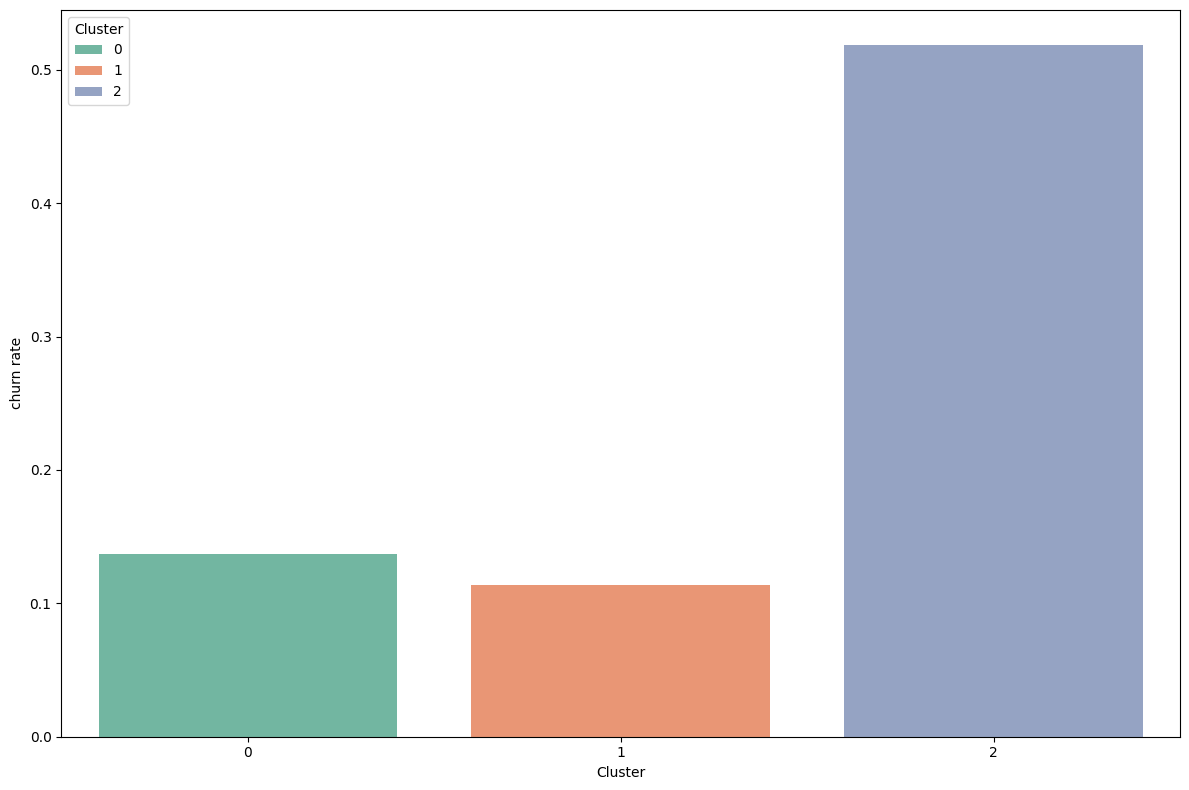

Churn rate:
cluster-0: 0.137%
cluster-1: 0.114%
cluster-2: 0.519%


In [73]:
caculate_ChurnRate_cluster(df=clustered_df)

In [74]:
from sklearn.metrics import silhouette_score

def evaluate_clustering(df, cluster_col='Cluster'):
    X = df.drop(columns=[cluster_col])
    labels = df[cluster_col]

    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.4f}")


In [75]:
evaluate_clustering(clustered_df)

Silhouette Score: 0.2081


In [76]:
def show_ThePairplot(df, cluster_col='Cluster', features=None):  
    sns.pairplot(df[features + [cluster_col]], hue=cluster_col, palette='Set2')
    plt.suptitle("pairplot with Cluster", y=1.00)
    plt.show()

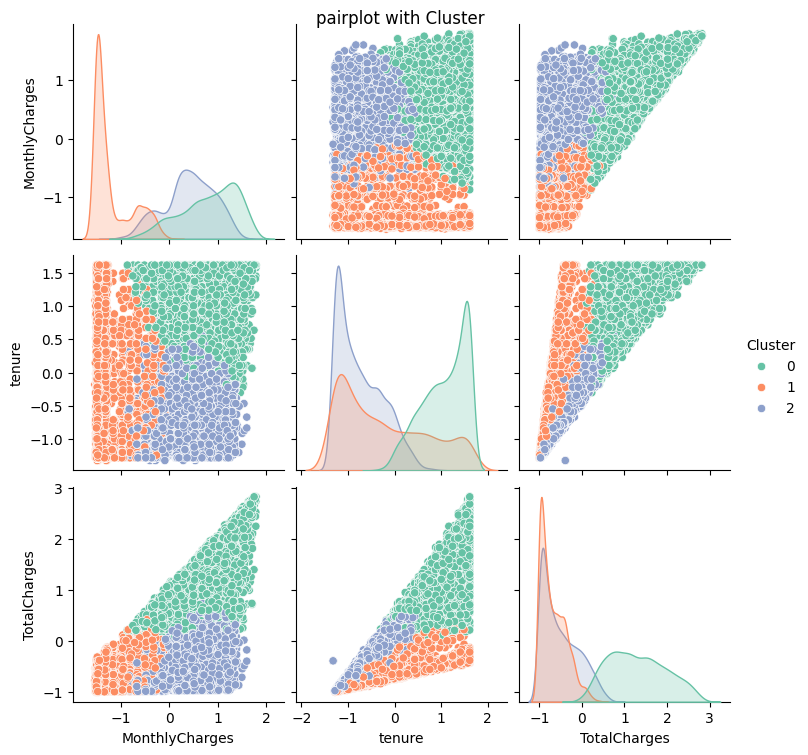

In [77]:
show_ThePairplot(df=clustered_df, features=['MonthlyCharges', 'tenure', 'TotalCharges'])